<a href="https://colab.research.google.com/github/BoshithaMGunarathna/Mental-Health-Prediction/blob/main/Machiine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Assuming the CSV file is uploaded in Colab
data = pd.read_csv('/content/Mental Health Dataset.csv')


# Data Preprocessing

In [4]:
data.isnull().sum()


,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [5]:
data['self_employed'].fillna(data['self_employed'].mode()[0], inplace=True)


<ipython-input-5-a18c7da4564a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['self_employed'].fillna(data['self_employed'].mode()[0], inplace=True)


In [6]:
data.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [7]:
label_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'Days_Indoors',
                 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
                 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']

label_encoder = LabelEncoder()
for col in label_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [8]:
data.drop('Timestamp', axis=1, inplace=True)


In [9]:
X = data.drop('treatment', axis=1)  # Features
y = data['treatment']  # Target


# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_train_encoded = label_encoder.fit_transform(y_train)

In [20]:
# Encode the target column to 0 and 1
y = data['treatment'].map({'No': 0, 'Yes': 1})


In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:26:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7747507396576198

Confusion Matrix:
 [[20694  8201]
 [ 4970 24608]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76     28895
           1       0.75      0.83      0.79     29578

    accuracy                           0.77     58473
   macro avg       0.78      0.77      0.77     58473
weighted avg       0.78      0.77      0.77     58473



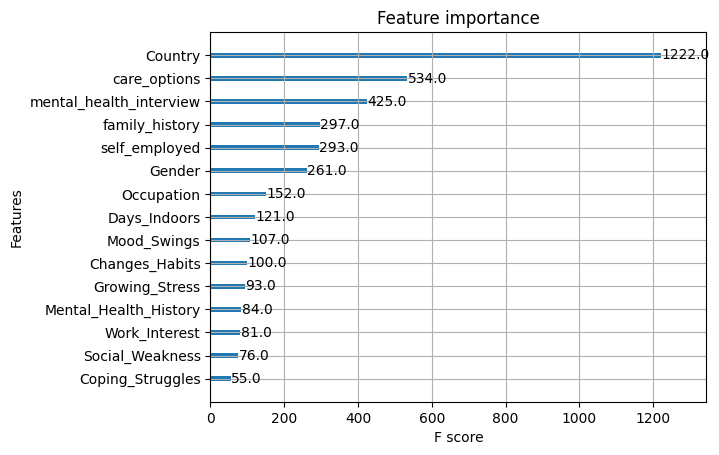

In [22]:
xgb.plot_importance(model)
plt.show()


# Improve

In [29]:

X = data.drop('treatment', axis=1)  # Features
y = data['treatment']  # Target

In [30]:
X = X.drop('Country', axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_train_encoded = label_encoder.fit_transform(y_train)

In [34]:
# Encode the target column to 0 and 1
y = data['treatment'].map({'No': 0, 'Yes': 1})

In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7126366015083885

Confusion Matrix:
 [[18942  9953]
 [ 6850 22728]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69     28895
           1       0.70      0.77      0.73     29578

    accuracy                           0.71     58473
   macro avg       0.71      0.71      0.71     58473
weighted avg       0.71      0.71      0.71     58473



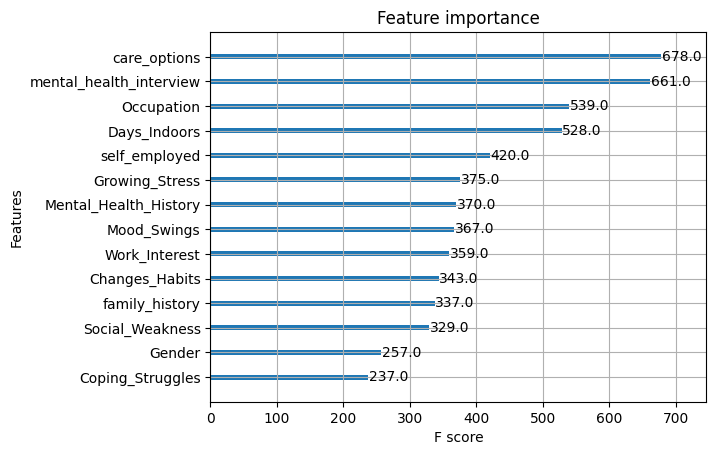

In [36]:
xgb.plot_importance(model)
plt.show()


In [37]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

xgb_clf = xgb.XGBClassifier(eval_metric='logloss')

search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=20,
                            scoring='accuracy', cv=3, verbose=1, random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

best_model = search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [38]:
y_pred_best = best_model.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Tuned Model Accuracy: 0.7175277478494347
[[19512  9383]
 [ 7134 22444]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70     28895
           1       0.71      0.76      0.73     29578

    accuracy                           0.72     58473
   macro avg       0.72      0.72      0.72     58473
weighted avg       0.72      0.72      0.72     58473



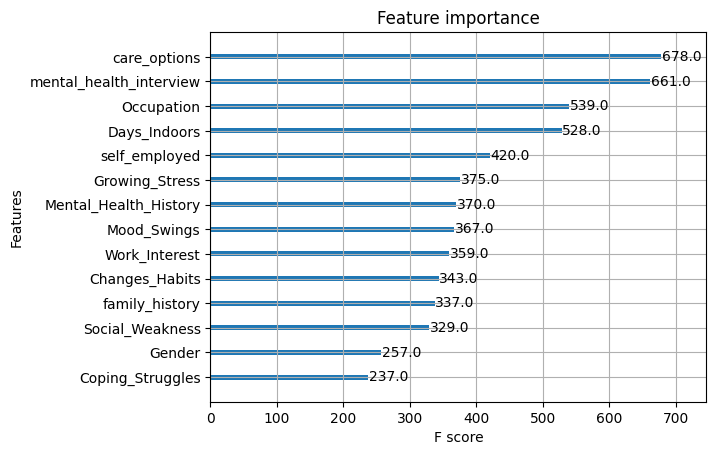

In [39]:
xgb.plot_importance(model)
plt.show()


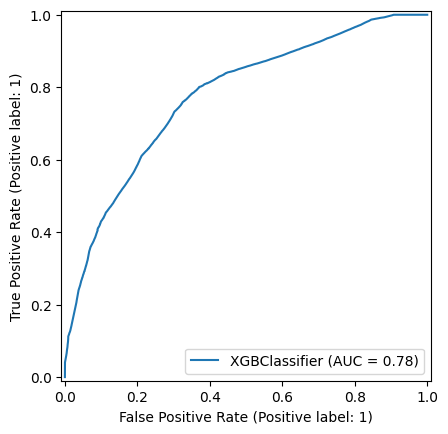

AUC Score: 0.7753712934033097


In [40]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()
print("AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))


# Feature Engineering

In [41]:
# 1. Age Grouping
X['age_group'] = pd.cut(X['Age'], bins=[0, 25, 35, 45, 60, 100],
                        labels=['<25', '25-35', '35-45', '45-60', '60+'])

KeyError: 'Age'